<h1>House Price Prediction</h1>
<p>the Calfornia Housing dataset</p>

DEPENDENCIES

In [ ]:
import seaborn as sns 
import pandas as pd 
from sklearn.datasets import fetch_california_housing
import numpy as np

LOADING THE DATA SET

In [6]:
california_housing = fetch_california_housing()

cali_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

print(cali_df.columns)

cali_df['Price'] = california_housing.target

cali_df.head()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


PREPROCESSING(SCALING) THE DATA

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = cali_df.drop('Price', axis=1)
y = cali_df['Price']

X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(20640, 8)


TRAIN-TEST-SPLIT MODEL IN SCIKIT <BR/>
80:20 SPLIT

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'train shape: {X_train.shape} \ntest shape: {X_test.shape}') #80:20

train shape: (16512, 8) 
test shape: (4128, 8)


BUILDING A LINEAR REGRESSION MODEL

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mean squared error : {mse}')
print(f'mean absolute error : {mae}')
print(f'r-squared : {r2}')

mean squared error : 0.5558915986952444
mean absolute error : 0.5332001304956566
r-squared : 0.5757877060324508


VISUALIZATION
(matplotlib and seaborn)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
regression_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

<Figure size 300x300 with 0 Axes>

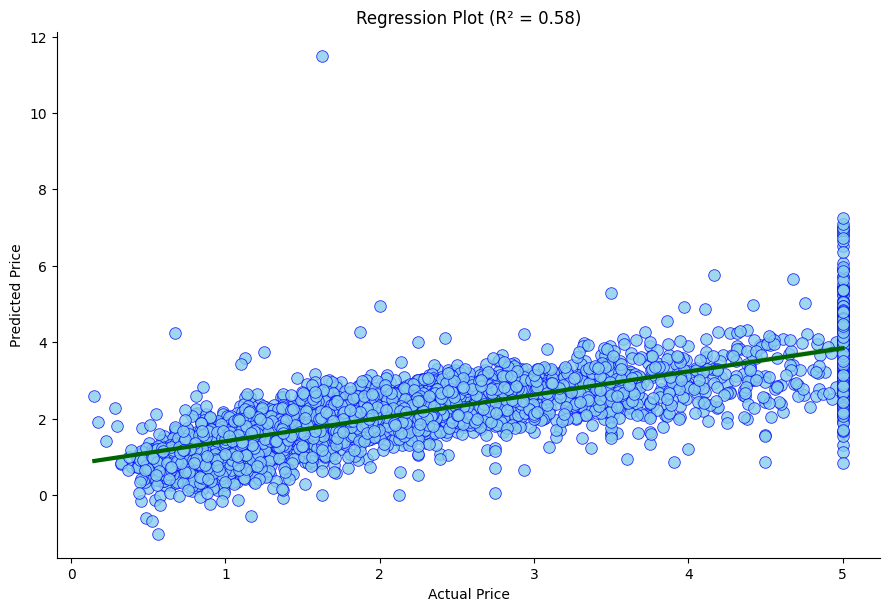

In [52]:

sns.lmplot(x='Actual', 
           y='Predicted', 
           data=regression_df, 
           aspect=1.5, 
           height=6, 
           scatter_kws={'s': 70, 'linewidths': 0.6, 'edgecolor': 'b','color':'skyblue'}, 
           line_kws={'color': 'darkgreen', 'lw': 3}) 

plt.title(f'Regression Plot (R² = {r2_score(y_test, y_pred):.2f})')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()